In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
wrf_mon_T2 = np.load("./data/WRF_T2_MONxLAT.npy")

In [26]:
area_factor = (
    np.cos(np.arange(180) * np.pi / 180) - np.cos(np.arange(1, 181) * np.pi / 180)
) / 2
# area factors for different latitudes

In [27]:
month_name = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]

In [28]:
lat = [20, 30, 40, 50]  # boundary latitudes for the plot

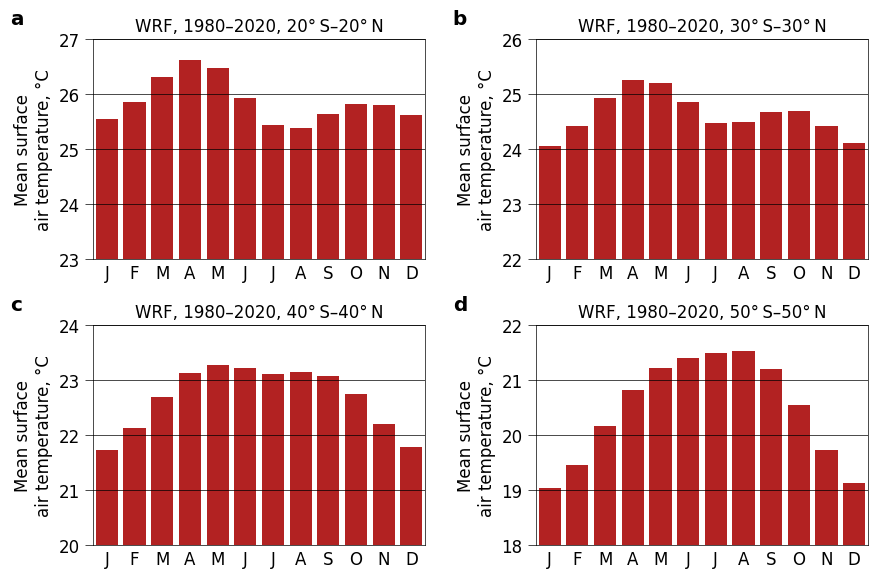

In [29]:
fig = plt.figure(figsize=(10, 14), constrained_layout=False)
ax = [None for _ in range(4)]
for n in range(4):
    ax[n] = fig.add_subplot(4, 4, (2 * n + 1, 2 * n + 2))

low = [23, 22, 20, 18]
high = [27, 26, 24, 22]
step = [1] * 4
coeff = [1] * 4
caption = [f"WRF, 1980–2020, {lt}° S–{lt}° N" for lt in lat]
# thin spaces (' ') are used between ‘°’ signs and letters
col = ["firebrick"] * 4

for n in range(4):
    for axis in ["top", "bottom", "left", "right"]:
        ax[n].spines[axis].set_linewidth(0.5)
    ax[n].tick_params(length=6, width=0.5, axis="y")
    ax[n].tick_params(length=0, width=0.5, axis="x")
    ax[n].grid(color="0.", linewidth=0.5, axis="y")

    ax[n].set_xlim((-0.5, 11.5))
    ax[n].set_xticks(np.arange(12))
    ax[n].set_xticklabels(month_name, fontsize="large", va="top")

    ax[n].set_ylim((low[n], high[n]))
    ax[n].set_yticks(np.arange(low[n], high[n] + step[n] / 2, step[n]))
    ax[n].set_yticklabels(
        (np.arange(low[n], high[n] + step[n] / 2, step[n]) / coeff[n]).astype(int),
        fontsize="large",
    )
    ax[n].set_ylabel("Mean surface\nair temperature, °C", fontsize="large")

    ax[n].set_title(caption[n], fontsize="large")

fig.align_ylabels([ax[0], ax[2]])
fig.align_ylabels([ax[1], ax[3]])

for n in range(4):
    # normalization of temperature values on the 
    # area of degree cells before summation:
    # T_avg =(T_1*S_1+T_2*S_2+...+T_2*S_N)/(S_1 + S_2 + ... +S_N)
    T_values = np.sum(
        wrf_mon_T2[90 - lat[n] : 90 + lat[n]]
        * area_factor[90 - lat[n] : 90 + lat[n], np.newaxis],
        axis=0,
    ) / np.sum(area_factor[90 - lat[n] : 90 + lat[n]])
    
    ax[n].bar(np.arange(12), T_values, width=0.8, color=col[n])

for n in range(4):
    ax[n].text(
        -0.25, 1.05,
        chr(ord("a") + n),
        fontsize="x-large",
        fontweight="semibold",
        ha="left", va="bottom",
        transform=ax[n].transAxes,
    )

fig.subplots_adjust(hspace=0.3, wspace=1.0)

fig.savefig(
    "figures_two_parts/t2.eps", bbox_inches="tight"
)